In [1]:
from pathlib import Path

import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

import pyarrow as pa
import pyarrow.parquet as pq

## Parameters

In [2]:
NOTEBOOK_NAME = "data-challenge"
NOTEBOOK_PATH = Path(NOTEBOOK_NAME).resolve()
NOTEBOOK_PATH.mkdir(exist_ok=True)
NOTEBOOK_PATH

WindowsPath('C:/Users/dasha/Documents/coding/octagon-data-science-competition/notebooks/data-challenge')

In [3]:
screen = pd.read_excel('../input/asthma-study-2019.xlsx',
                      sheet_name='Screen')
screen.head()

,id,date,clinic,infconsent,18+,eos300,eos150,sputum,acq-screen,result
0,2311,2017-02-11,23,y,y,0.0,NaN,NaN,3.666667,n
1,2800,2017-02-11,28,y,y,1.0,NaN,NaN,3.000000,NaN
2,1110,2017-02-12,11,y,y,0.0,NaN,NaN,3.833333,n
3,302,2017-02-16,3,y,y,0.0,NaN,NaN,3.166667,n
4,1102,2017-02-16,11,y,y,1.0,NaN,NaN,3.666667,NaN


In [4]:
demo1 = pd.read_excel('../input/asthma-study-2019.xlsx',
                      sheet_name='Demographics')
demo1.head()

,id,age,race,ethnicity,gender,work,retire,disab
0,102,25,Canadian,White,0,1,NaN,0
1,105,97,Canadian,NaN,0,0,0.0,0
2,118,50,Canadian,NaN,0,0,0.0,1
3,119,22,Canadian,arab,0,1,NaN,0
4,120,52,Canadian,NaN,0,0,1.0,1


In [5]:
demo2 = pd.read_excel('../input/asthma-study-2019.xlsx',
                      sheet_name='Demographics(1)')
demo2.head() 

,id,assess,birthyear,race,sex,work,retire,disab
0,1113,2017-02-11,1976,filipino,0,0,1.0,0
1,2902,2017-02-11,1964,chinese,0,0,1.0,0
2,1908,2017-02-12,1954,south east asian,0,1,NaN,0
3,3002,2017-02-16,1976,south asian,1,0,1.0,1
4,3006,2017-02-16,1982,south asian,0,1,NaN,1


In [6]:
print(demo1.shape, demo2.shape)
demo = pd.concat([demo1, demo2], sort=False)
demo

(57, 8) (344, 8)


,id,age,race,ethnicity,gender,work,retire,disab,assess,birthyear,sex
0,102,25.0,Canadian,White,0.0,1,NaN,0,NaT,NaN,NaN
1,105,97.0,Canadian,NaN,0.0,0,0.0,0,NaT,NaN,NaN
2,118,50.0,Canadian,NaN,0.0,0,0.0,1,NaT,NaN,NaN
3,119,22.0,Canadian,arab,0.0,1,NaN,0,NaT,NaN,NaN
4,120,52.0,Canadian,NaN,0.0,0,1.0,1,NaT,NaN,NaN
5,124,34.0,Canadian,Syria/Serbia,0.0,0,1.0,0,NaT,NaN,NaN
6,1100,52.0,white,NaN,0.0,0,0.0,0,NaT,NaN,NaN
7,900,65.0,black,NaN,0.0,0,0.0,1,NaT,NaN,NaN
8,2900,77.0,asian,NaN,0.0,1,NaN,0,NaT,NaN,NaN
9,2500,51.0,asian,hawaii,0.0,1,NaN,0,NaT,NaN,NaN


In [7]:
hist1 = pd.read_excel('../input/asthma-study-2019.xlsx',
                      sheet_name='medhistory')
hist1.head()

,id,co-copd,co-heartfailure,co-diabetes,co-yellowfever,co-asthma,co-pulmonaryembolism,co-bronchitis,co-arthritis,co-pneumonia
0,100,NaN,0.511612,0.797143,NaN,0.789300,NaN,NaN,NaN,0.860042
1,101,NaN,NaN,0.730094,NaN,0.891995,NaN,NaN,NaN,0.442976
2,102,NaN,NaN,0.099612,NaN,1.000000,NaN,1.0,NaN,0.882046
3,103,0.0,NaN,0.013703,NaN,NaN,NaN,NaN,1.0,0.956755
4,104,NaN,NaN,0.825495,NaN,1.000000,NaN,NaN,NaN,0.712851


In [8]:
hist1.rename(
    columns={"co-arthritis": "arthritis", 
             "co-bronchitis": "bronchitis",
            "co-pneumonia": "pneumonia",
            "co-diabetes": "diabetes",
            "co-heartfailure": "hearfailure",
            "co-pulmonaryembolism":"pulmonaryembolism",
            "co-copd": "copd",
            "co-asthma": "asthma"}, inplace=True)

In [9]:
# hist1.head()
# hist1.drop(["co-yellowfever"], axis=1, inplace=True)
hist1.head()

,id,copd,hearfailure,diabetes,co-yellowfever,asthma,pulmonaryembolism,bronchitis,arthritis,pneumonia
0,100,NaN,0.511612,0.797143,NaN,0.789300,NaN,NaN,NaN,0.860042
1,101,NaN,NaN,0.730094,NaN,0.891995,NaN,NaN,NaN,0.442976
2,102,NaN,NaN,0.099612,NaN,1.000000,NaN,1.0,NaN,0.882046
3,103,0.0,NaN,0.013703,NaN,NaN,NaN,NaN,1.0,0.956755
4,104,NaN,NaN,0.825495,NaN,1.000000,NaN,NaN,NaN,0.712851


In [10]:
hist2 = pd.read_excel('../input/asthma-study-2019.xlsx',
                      sheet_name='medhistory(1)')
hist2.head()

,id,assess,smoking,polyps,vaccine,arthritis,CVD,Prev-biologic,allergy,weight,height
0,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,135,43689.0,0.000000,0.4,0.08,0.31,0.07,0.8,0.2,112.0,55.0
2,136,43010.0,0.337016,0.2,0.17,0.34,0.45,1.0,0.9,152.0,50.0
3,137,43124.0,0.509537,0.3,0.48,0.15,0.19,1.0,0.1,289.0,77.0
4,138,43404.0,0.000000,0.5,0.31,0.17,0.04,1.0,0.4,132.0,74.0


In [11]:
hist2.rename(columns={"id ": "id"}, inplace=True)
hist1.rename(columns={"id ": "id"}, inplace=True)

In [12]:
hist=pd.concat([hist1, hist2], sort=False)

In [13]:
print(hist1.shape, hist2.shape, hist.shape, len(hist['id'].unique()))

(57, 10) (344, 11) (401, 19) 401


In [14]:
hist.head()

,id,copd,hearfailure,diabetes,co-yellowfever,asthma,pulmonaryembolism,bronchitis,arthritis,pneumonia,assess,smoking,polyps,vaccine,CVD,Prev-biologic,allergy,weight,height
0,100,NaN,0.511612,0.797143,NaN,0.789300,NaN,NaN,NaN,0.860042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101,NaN,NaN,0.730094,NaN,0.891995,NaN,NaN,NaN,0.442976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,102,NaN,NaN,0.099612,NaN,1.000000,NaN,1.0,NaN,0.882046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103,0.0,NaN,0.013703,NaN,NaN,NaN,NaN,1.0,0.956755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104,NaN,NaN,0.825495,NaN,1.000000,NaN,NaN,NaN,0.712851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
acq = pd.read_excel('../input/asthma-study-2019.xlsx',
                      sheet_name='ACQ')
acq.head()

,id,date,acq,date2,acq2,date3,acq3,date4,acq4,date5,acq5
0,122,1900-01-01,3.666667,1900-01-02,2.200000,1900-01-03,2.420000,1900-01-04,2.420,1900-01-05,2.1780
1,129,1900-01-01,1.833333,1900-01-02,0.366667,1900-01-03,0.403333,2018-11-28,0.484,2019-02-07,0.4356
2,120,1900-01-01,3.500000,1900-01-02,3.850000,1900-02-02,4.235000,1900-01-04,5.082,2018-08-26,3.5574
3,127,1900-01-01,6.000000,1900-01-22,1.800000,1900-01-03,1.980000,2018-07-16,1.584,2018-09-14,1.2672
4,123,1900-01-01,1.500000,1900-01-02,0.600000,1900-01-03,0.600000,1900-01-04,0.480,1900-01-05,0.5280


In [16]:
from pandas import datetime as dt


In [17]:
acq['time1'] = 0
acq['time2'] = ((acq["date2"] - acq['date'])/np.timedelta64(1, 'D')).astype(int)
acq['time3'] = ((acq["date3"] - acq['date'])/np.timedelta64(1, 'D')).astype(int)
acq['time4'] = ((acq["date4"] - acq['date'])/np.timedelta64(1, 'D')).astype(int)
acq['time5'] = ((acq["date5"] - acq['date'])/np.timedelta64(1, 'D')).astype(int)

In [18]:
acq

,id,date,acq,date2,acq2,date3,acq3,date4,acq4,date5,acq5,time1,time2,time3,time4,time5
0,122,1900-01-01,3.666667,1900-01-02,2.200000,1900-01-03,2.420000,1900-01-04,2.420000,1900-01-05,2.178000,0,1,2,3,4
1,129,1900-01-01,1.833333,1900-01-02,0.366667,1900-01-03,0.403333,2018-11-28,0.484000,2019-02-07,0.435600,0,1,2,43430,43501
2,120,1900-01-01,3.500000,1900-01-02,3.850000,1900-02-02,4.235000,1900-01-04,5.082000,2018-08-26,3.557400,0,1,32,3,43336
3,127,1900-01-01,6.000000,1900-01-22,1.800000,1900-01-03,1.980000,2018-07-16,1.584000,2018-09-14,1.267200,0,21,2,43295,43355
4,123,1900-01-01,1.500000,1900-01-02,0.600000,1900-01-03,0.600000,1900-01-04,0.480000,1900-01-05,0.528000,0,1,2,3,4
5,119,1900-01-01,1.666667,1900-01-02,0.666667,1900-01-03,0.666667,1900-01-04,0.800000,1900-01-05,0.720000,0,1,2,3,4
6,111,1900-01-01,5.000000,1900-01-02,0.000000,1900-01-03,0.000000,2019-05-16,0.000000,2019-07-14,0.000000,0,1,2,43599,43658
7,101,1900-01-01,1.500000,1900-01-02,0.450000,1900-01-03,0.405000,1900-01-04,0.486000,2019-01-25,0.388800,0,1,2,3,43488
8,118,1900-01-01,3.333333,1900-01-02,4.333333,1900-01-03,4.766667,1900-01-04,3.813333,1900-01-05,2.669333,0,1,2,3,4
9,117,1900-01-01,2.333333,1900-01-02,0.233333,1900-01-03,0.233333,1900-01-04,0.186667,1900-01-05,0.205333,0,1,2,3,4


In [19]:
acq.loc[acq["time2"] > 1000, ["time2"]] = None
acq.loc[acq["time3"] > 1000, ["time3"]] = None
acq.loc[acq["time4"] > 1000, ["time4"]] = None
acq.loc[acq["time5"] > 1000, ["time5"]] = None

In [20]:
acq

,id,date,acq,date2,acq2,date3,acq3,date4,acq4,date5,acq5,time1,time2,time3,time4,time5
0,122,1900-01-01,3.666667,1900-01-02,2.200000,1900-01-03,2.420000,1900-01-04,2.420000,1900-01-05,2.178000,0,1.0,2.0,3.0,4.0
1,129,1900-01-01,1.833333,1900-01-02,0.366667,1900-01-03,0.403333,2018-11-28,0.484000,2019-02-07,0.435600,0,1.0,2.0,NaN,NaN
2,120,1900-01-01,3.500000,1900-01-02,3.850000,1900-02-02,4.235000,1900-01-04,5.082000,2018-08-26,3.557400,0,1.0,32.0,3.0,NaN
3,127,1900-01-01,6.000000,1900-01-22,1.800000,1900-01-03,1.980000,2018-07-16,1.584000,2018-09-14,1.267200,0,21.0,2.0,NaN,NaN
4,123,1900-01-01,1.500000,1900-01-02,0.600000,1900-01-03,0.600000,1900-01-04,0.480000,1900-01-05,0.528000,0,1.0,2.0,3.0,4.0
5,119,1900-01-01,1.666667,1900-01-02,0.666667,1900-01-03,0.666667,1900-01-04,0.800000,1900-01-05,0.720000,0,1.0,2.0,3.0,4.0
6,111,1900-01-01,5.000000,1900-01-02,0.000000,1900-01-03,0.000000,2019-05-16,0.000000,2019-07-14,0.000000,0,1.0,2.0,NaN,NaN
7,101,1900-01-01,1.500000,1900-01-02,0.450000,1900-01-03,0.405000,1900-01-04,0.486000,2019-01-25,0.388800,0,1.0,2.0,3.0,NaN
8,118,1900-01-01,3.333333,1900-01-02,4.333333,1900-01-03,4.766667,1900-01-04,3.813333,1900-01-05,2.669333,0,1.0,2.0,3.0,4.0
9,117,1900-01-01,2.333333,1900-01-02,0.233333,1900-01-03,0.233333,1900-01-04,0.186667,1900-01-05,0.205333,0,1.0,2.0,3.0,4.0


In [21]:
acq["date"].dt.year.unique()

array([1900, 2017, 2018, 2019], dtype=int64)

In [ ]:
# acq.drop((acq[acq["date"].dt.year == 1900]).index, axis=0, inplace=True)

In [23]:
acq["date5"].dt.year.unique()

array([1900, 2019, 2018, 2020, 2017], dtype=int64)

In [24]:
data = acq.copy()

In [25]:
data.drop(["date", "date2", "date3", "date4", "date5"], axis=1, inplace=True)

In [26]:
times = data[["time1", "time2", "time3", "time4", "time5"]].T
times


,0,1,2,3,4,5,6,7,8,9,...,187,188,189,190,191,192,193,194,195,196
time1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
time2,1.0,1.0,1.0,21.0,1.0,1.0,1.0,1.0,1.0,1.0,...,10.0,7.0,10.0,12.0,10.0,11.0,9.0,9.0,10.0,11.0
time3,2.0,2.0,32.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,21.0,14.0,19.0,20.0,21.0,18.0,16.0,20.0,19.0,19.0
time4,3.0,NaN,3.0,NaN,3.0,3.0,NaN,3.0,3.0,3.0,...,41.0,33.0,37.0,39.0,41.0,37.0,34.0,36.0,33.0,40.0
time5,4.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,4.0,4.0,...,107.0,92.0,108.0,98.0,108.0,108.0,103.0,92.0,101.0,101.0


In [27]:
acqs = data[["acq", "acq2", "acq3", "acq4", "acq5"]].T
acqs

,0,1,2,3,4,5,6,7,8,9,...,187,188,189,190,191,192,193,194,195,196
acq,3.666667,1.833333,3.5000,6.0000,1.500,1.666667,5.0,1.5000,3.333333,2.333333,...,3.500,3.666667,3.833333,3.166667,1.833333,3.000,1.0,4.166667,6.000,5.500
acq2,2.200000,0.366667,3.8500,1.8000,0.600,0.666667,0.0,0.4500,4.333333,0.233333,...,4.200,0.733333,5.366667,1.900000,0.916667,NaN,11.0,2.500000,2.400,2.200
acq3,2.420000,0.403333,4.2350,1.9800,0.600,0.666667,0.0,0.4050,4.766667,0.233333,...,4.200,0.660000,5.366667,1.900000,1.008333,4.290,1.0,2.500000,2.160,1.980
acq4,2.420000,0.484000,5.0820,1.5840,0.480,0.800000,0.0,0.4860,3.813333,0.186667,...,3.360,0.792000,4.830000,1.520000,1.008333,4.290,2.0,3.000000,2.376,1.980
acq5,2.178000,0.435600,3.5574,1.2672,0.528,0.720000,0.0,0.3888,2.669333,0.205333,...,4.032,0.633600,6.279000,1.976000,1.109167,5.148,6.0,2.700000,2.376,1.386


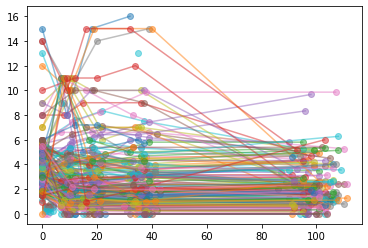

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
plt.plot(times, acqs, 'o-', alpha=0.5)
plt.savefig(NOTEBOOK_PATH / "ACQtrendsWithAbove6.svg", bbox_inches="tight")
plt.show()


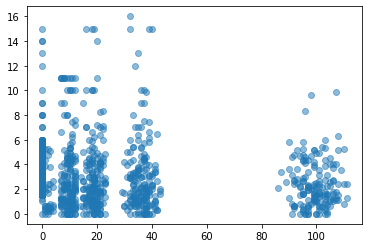

In [29]:

plt.scatter(times, acqs, alpha=0.5)
plt.show()

In [31]:
print(len(acq[acq["acq2"] > 6]), len(acq))

26 197


In [32]:
acq_ids = acq['id']
def count_ids(data, id_set):
    count = 0
    for item in data:
        if item in id_set:
            count += 1
#             print(item)
    return count

In [33]:
print(count_ids(demo1["id"], acq["id"]))
print(count_ids(demo2["id"], acq_ids))

34
8


In [34]:
len(set(screen["id"]))

401

In [35]:
len(set(acq["id"]))

197

In [36]:
len(set(acq["id"]) - set(screen["id"]))

0

In [37]:
len(set(acq["id"]) & set(screen["id"]))

197

In [38]:
print("Number of patricipants in ACQ that are present in the Hist1:", count_ids(hist1["id"].values, acq["id"].values))
print("Number of patricipants in ACQ that are present in the Hist2:", count_ids(hist2["id"].values, acq["id"].values))
print("Number of patricipants in ACQ that are present in the SCREEN:", count_ids(screen["id"].values, acq["id"].values))
print("Number of patricipants in ACQ that are present in the Demo1:", count_ids(demo1["id"].values, acq["id"].values))
print("Number of patricipants in ACQ that are present in the Demo2:", count_ids(demo2["id"].values, acq["id"].values))


Number of patricipants in ACQ that are present in the Hist1: 26
Number of patricipants in ACQ that are present in the Hist2: 171
Number of patricipants in ACQ that are present in the SCREEN: 197
Number of patricipants in ACQ that are present in the Demo1: 26
Number of patricipants in ACQ that are present in the Demo2: 171


Features in MedicalHistory1 are very different from features in MedicalHistory2. Demographics information for the second group is also much more complete than that for the first group (e.g., in Demographics1 "race" is often recorded as "Canadian").Since most of the IDs in ACQ dataframe are coming from the second group (171 participants vs 14 participants in the frist group), we will just use the second group to extract feautre about medical history and demographics. We'll drop the "retire" column from demographic analysis because a lot of the data there is missing.

In [39]:
print(count_ids(screen["id"], acq[acq["acq2"] > 6]))

0


In [40]:
demo_all = demo.copy()
hist_all = hist.copy()

In [41]:
demo = demo2.copy()
hist=hist2.copy()

In [42]:
demo.drop(["retire"], inplace=True, axis=1)

In [43]:
info = demo.merge(hist, on='id', how="outer")

In [44]:
info.columns

Index(['id', 'assess_x', 'birthyear', 'race', 'sex', 'work', 'disab',
       'assess_y', 'smoking', 'polyps', 'vaccine', 'arthritis', 'CVD',
       'Prev-biologic', 'allergy', 'weight', 'height'],
      dtype='object')

In [45]:
info["age"] = info["assess_x"].dt.year - info['birthyear']

In [46]:
X_all = info[['id', "race", "sex", "work",
              "disab", "smoking", "polyps", "vaccine", "arthritis","CVD",
             'Prev-biologic', 'allergy', 'weight', 'height', 'age']].copy()

In [47]:
lookup = set(acq["id"])
X_all["in_study"] = X_all["id"].isin(lookup) 

In [48]:
X_all

,id,race,sex,work,disab,smoking,polyps,vaccine,arthritis,CVD,Prev-biologic,allergy,weight,height,age,in_study
0,1113,filipino,0,0,0,0.195593,0.1,0.32,0.10,0.54,0.4,0.6,257.0,70.0,41,True
1,2902,chinese,0,0,0,0.333048,0.2,0.12,0.31,0.42,0.1,0.1,277.0,59.0,53,False
2,1908,south east asian,0,1,0,0.493515,0.2,0.40,0.01,0.50,0.1,0.6,146.0,70.0,63,True
3,3002,south asian,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,False
4,3006,south asian,0,1,1,0.471206,0.1,0.20,0.37,0.74,0.2,0.8,242.0,72.0,35,False
5,1209,white (caucasian),1,1,1,0.374920,0.5,0.03,0.34,0.13,0.1,0.0,130.0,68.0,22,False
6,1705,south east asian,0,0,0,0.027924,0.3,0.28,0.11,0.31,0.7,0.5,251.0,76.0,83,False
7,3004,south asian,0,0,1,0.359783,0.4,0.46,0.29,0.53,0.5,0.8,127.0,60.0,63,True
8,1707,black,1,1,1,0.093265,0.2,0.01,0.44,0.56,0.8,0.4,133.0,65.0,85,False
9,2108,aboriginal,0,1,1,0.206549,0.2,0.02,0.04,0.54,0.4,0.7,140.0,72.0,32,False


In [ ]:
# lookup = set(acq["id"])

# X_in = X_all[X_all["id"].isin(lookup)]
# X_out = X_all[~X_all["id"].isin(lookup)]

In [ ]:
# plt.bar([1,2], [ X_in["weight"].mean(),X_out["weight"].mean()])  #, )

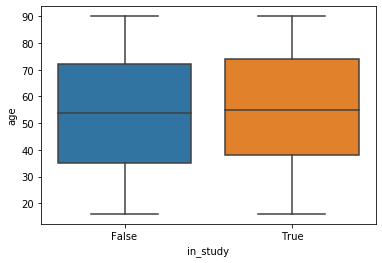

In [93]:
sns.boxplot(x="in_study", y="age", data=X_all)

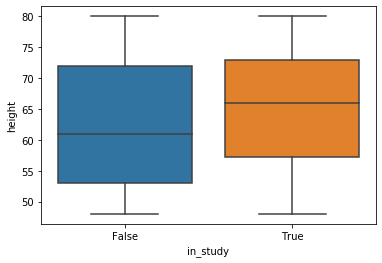

In [147]:
plt.figure()
sns.boxplot(x="in_study", y="height", data=X_all)
plt.savefig(NOTEBOOK_PATH / "HeightInOutStudy.svg", bbox_inches="tight")

Removing all data from participants where at least one of ACQ scores was above 6, since 6 is the maximum possible ACQ score.

In [52]:
data_inrange = data[~(data[["acq", "acq2", "acq3", "acq4", "acq5"]] > 6).any(axis=1)].copy()
data_inrange.head()

,id,acq,acq2,acq3,acq4,acq5,time1,time2,time3,time4,time5
0,122,3.666667,2.200000,2.420000,2.420,2.1780,0,1.0,2.0,3.0,4.0
1,129,1.833333,0.366667,0.403333,0.484,0.4356,0,1.0,2.0,NaN,NaN
2,120,3.500000,3.850000,4.235000,5.082,3.5574,0,1.0,32.0,3.0,NaN
3,127,6.000000,1.800000,1.980000,1.584,1.2672,0,21.0,2.0,NaN,NaN
4,123,1.500000,0.600000,0.600000,0.480,0.5280,0,1.0,2.0,3.0,4.0


In [53]:
times_inrange = data_inrange[["time1", "time2", "time3", "time4", "time5"]].T
acqs_inrange = data_inrange[["acq", "acq2", "acq3", "acq4", "acq5"]].T
acqs_inrange

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,190,191,192,194,195,196
acq,3.666667,1.833333,3.5000,6.0000,1.500,1.666667,5.0,1.5000,3.333333,2.333333,...,6.0,2.833333,3.500,3.666667,3.166667,1.833333,3.000,4.166667,6.000,5.500
acq2,2.200000,0.366667,3.8500,1.8000,0.600,0.666667,0.0,0.4500,4.333333,0.233333,...,0.0,0.566667,4.200,0.733333,1.900000,0.916667,NaN,2.500000,2.400,2.200
acq3,2.420000,0.403333,4.2350,1.9800,0.600,0.666667,0.0,0.4050,4.766667,0.233333,...,0.0,0.510000,4.200,0.660000,1.900000,1.008333,4.290,2.500000,2.160,1.980
acq4,2.420000,0.484000,5.0820,1.5840,0.480,0.800000,0.0,0.4860,3.813333,0.186667,...,0.0,0.612000,3.360,0.792000,1.520000,1.008333,4.290,3.000000,2.376,1.980
acq5,2.178000,0.435600,3.5574,1.2672,0.528,0.720000,0.0,0.3888,2.669333,0.205333,...,0.0,0.550800,4.032,0.633600,1.976000,1.109167,5.148,2.700000,2.376,1.386


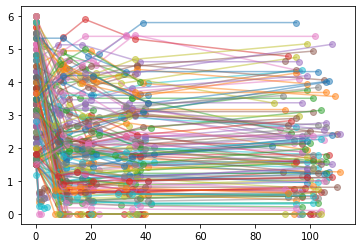

In [150]:
plt.figure()
plt.plot(times_inrange, acqs_inrange, "o-", alpha=0.5)
plt.savefig(NOTEBOOK_PATH / "ACQtrendsBelow6.svg", bbox_inches="tight")

In [110]:
data_final = X_all.merge(data_inrange, how="left", on="id")
assert len(data_final2) == len(X_all)

In [177]:
data_final["y"] = data_final[["acq2", "acq3", "acq4", "acq5"]].mean(axis=1) - data_final["acq"]


In [178]:
data_final["y"].describe()

count    143.000000
mean      -1.430074
std        1.693643
min       -6.000000
25%       -2.540500
50%       -1.328500
75%       -0.242222
max        1.767500
Name: y, dtype: float64

In [395]:
print(len(data_final[data_final["y"] > -1.0]), len(data_final['y'].dropna()), len(data_final))

64 143 344


In [390]:
data_instudy = data_final[data_final["y"].notnull()].copy()
len(data_instudy)


143

In [397]:
data_instudy["y_bi"] = data_instudy["y"] < -1.0

In [398]:
data_instudy.columns

Index(['id', 'race', 'sex', 'work', 'disab', 'smoking', 'polyps', 'vaccine',
       'arthritis', 'CVD', 'Prev-biologic', 'allergy', 'weight', 'height',
       'age', 'in_study', 'acq', 'acq2', 'acq3', 'acq4', 'acq5', 'time1',
       'time2', 'time3', 'time4', 'time5', 'y', 'response', 'y_bi'],
      dtype='object')

In [399]:
X = data_instudy[['sex', 'work', 'disab', 'smoking', 'polyps', 'vaccine',
       'arthritis', 'CVD', 'Prev-biologic', 'allergy', 'weight', 'height',
       'age']].copy()
X.replace(np.nan, df.mean(axis=0), inplace=True)

In [400]:
y = data_instudy["y_bi"]
y.value_counts()

True     79
False    64
Name: y_bi, dtype: int64

# Fitting Decision Tree

In [210]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [389]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(metrics.f1_score, average="weighted")
jaccard_scorer = make_scorer(metrics.jaccard_similarity_score)
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings("ignore", "jaccard_similarity_score", DeprecationWarning)
clfs_list = []

In [352]:
from sklearn.model_selection import KFold
from sklearn import metrics

kf = KFold(n_splits=5)

In [401]:
def test_param_DT2(xaxis, criterion, class_weight, n):
    cv = StratifiedKFold(5, shuffle=True, random_state=21)
    y_real = []
    y_pred = []
    for train_index, test_index in cv.split(X, y):
        loan_clf = DecisionTreeClassifier(criterion=criterion, max_depth=n, class_weight=class_weight)
        X_train, X_test = X.values[train_index, :], X.values[test_index, :]
        y_train, y_test = y.values[train_index], y.values[test_index]
        loan_clf.fit(X_train, y_train)
        y_pred.append(loan_clf.predict(X_test))
        y_real.append(y_test)
    return np.hstack(y_real), np.hstack(y_pred)

In [402]:
def test_param_DT(xaxis, criterion, class_weight):
    cv = StratifiedKFold(5, shuffle=True, random_state=21)
    mean_accuracy = []
    SE_accuracy = []
    mean_f1score = []
    SE_f1score = []
    mean_jaccard = []
    SE_jaccard = []
    params = []
    for n in range(1, 24):
        loan_clf = DecisionTreeClassifier(criterion=criterion, max_depth=n, class_weight=class_weight)
        mean_accuracy.append(cross_val_score(loan_clf, X, y, cv=cv, scoring='accuracy').mean())
        SE_accuracy.append(cross_val_score(loan_clf, X, y, cv=cv, scoring='accuracy').std()/np.sqrt(5))
        mean_f1score.append(cross_val_score(loan_clf, X, y, cv=cv, scoring=f1_scorer).mean())
        SE_f1score.append(cross_val_score(loan_clf, X, y, cv=cv, scoring=f1_scorer).std()/np.sqrt(5))
        mean_jaccard.append(cross_val_score(loan_clf, X, y, cv=cv, scoring=jaccard_scorer).mean())
        SE_jaccard.append(cross_val_score(loan_clf, X, y, cv=cv, scoring=jaccard_scorer).std()/np.sqrt(5))
        params.append(n)
    mean_accuracy = np.asarray(mean_accuracy)
    mean_f1score = np.asarray(mean_f1score)
    mean_jaccard = np.asarray(mean_jaccard)
    print(mean_accuracy)
    print(mean_f1score)
    print(mean_jaccard)
    plt.figure()
    plt.plot(params, mean_accuracy)
    plt.fill_between(params, mean_accuracy - 1 * SE_accuracy, mean_accuracy + 1 * SE_accuracy, alpha=0.10)
    plt.legend(('Accuracy ', '+/- StandErr'))
    plt.ylabel('Accuracy')
    plt.xlabel(xaxis)
    plt.figure()
    plt.plot(params, mean_f1score)
    plt.fill_between(params, mean_f1score - 1 * SE_f1score, mean_f1score + 1 * SE_f1score, alpha=0.10)
    plt.legend(('F1 Score', '+/- StandErr'))
    plt.ylabel('F1 Score')
    plt.xlabel(xaxis)
    plt.figure()
    plt.plot(params, mean_jaccard)
    plt.fill_between(params, mean_jaccard - 1 * SE_jaccard, mean_jaccard + 1 * SE_jaccard, alpha=0.10)
    plt.legend(('Jaccard Similarity Score', '+/- StandErr'))
    plt.ylabel('Jaccard Similarity Score')
    plt.xlabel(xaxis)
    print("")
    print( "The best accuracy was", round(mean_accuracy.max(), 5), "with %s =" % xaxis, params[mean_accuracy.argmax()]) 
    print( "The best F1 Score was", round(mean_f1score.max(), 5), "with %s =" % xaxis, params[mean_f1score.argmax()]) 
    print( "The best Jaccard Similarity score was", round(mean_jaccard.max(), 5), "with %s =" % xaxis, params[mean_jaccard.argmax()])
    best_fit = {
        '1: Classifier': 'loanTree, %s %d, %s, %s' % (xaxis, params[mean_f1score.argmax()], criterion, class_weight),
        '2: Accuracy': mean_accuracy.max(),
        '3: F1 Score': mean_f1score.max(),
        '4: Jaccard': mean_jaccard.max(),
    }
    clfs_list.append(best_fit)

C:\Users\dasha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dasha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dasha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dasha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dasha\Anaconda3\lib\site-packages\sklearn\metrics\c

[0.54 0.57 0.6  0.58 0.65 0.61 0.57 0.56 0.53 0.57 0.54 0.53 0.53 0.55
 0.54 0.55 0.56 0.54 0.59 0.59 0.54 0.55 0.57]
[0.44 0.48 0.56 0.55 0.61 0.58 0.56 0.55 0.55 0.54 0.61 0.55 0.53 0.56
 0.56 0.54 0.55 0.59 0.57 0.56 0.52 0.55 0.53]
[0.54 0.55 0.59 0.56 0.62 0.61 0.6  0.6  0.56 0.56 0.51 0.54 0.52 0.55
 0.58 0.54 0.57 0.54 0.55 0.57 0.57 0.55 0.55]

The best accuracy was 0.65057 with Max Depth of Tree = 5
The best F1 Score was 0.60661 with Max Depth of Tree = 5
The best Jaccard Similarity score was 0.62299 with Max Depth of Tree = 5


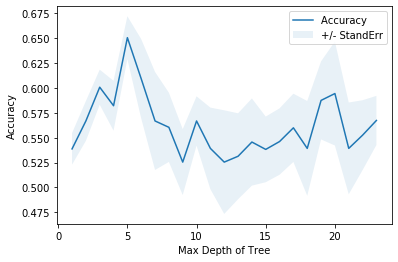

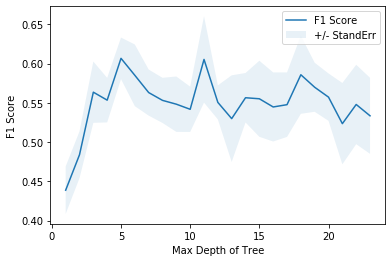

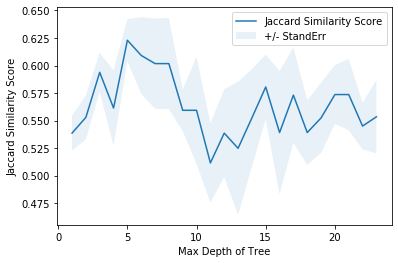

In [403]:
test_param_DT('Max Depth of Tree', 'entropy', None)

[0.52 0.57 0.52 0.55 0.52 0.55 0.52 0.51 0.49 0.46 0.49 0.5  0.5  0.48
 0.5  0.49 0.49 0.47 0.5  0.49 0.46 0.49 0.48]
[0.48 0.57 0.5  0.51 0.49 0.55 0.52 0.45 0.5  0.45 0.46 0.49 0.49 0.48
 0.48 0.47 0.5  0.45 0.49 0.5  0.5  0.52 0.48]
[0.52 0.57 0.53 0.55 0.53 0.55 0.49 0.49 0.48 0.5  0.49 0.48 0.48 0.52
 0.5  0.48 0.5  0.47 0.48 0.48 0.48 0.5  0.47]

The best accuracy was 0.56577 with Max Depth of Tree = 2
The best F1 Score was 0.57105 with Max Depth of Tree = 2
The best Jaccard Similarity score was 0.56577 with Max Depth of Tree = 2


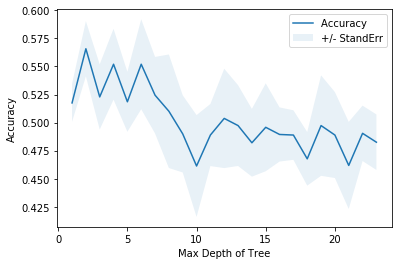

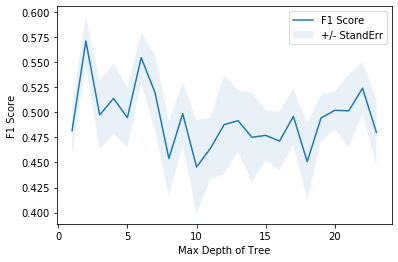

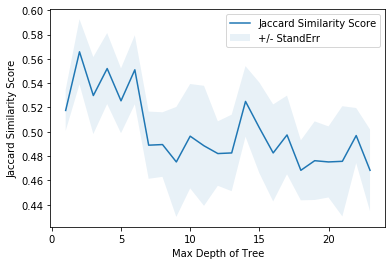

In [405]:
test_param_DT('Max Depth of Tree', 'entropy', "balanced")

[0.54 0.55 0.62 0.62 0.54 0.59 0.59 0.59 0.57 0.57 0.57 0.55 0.61 0.56
 0.55 0.59 0.55 0.59 0.59 0.56 0.53 0.57 0.55]
[0.47 0.49 0.6  0.6  0.52 0.57 0.53 0.58 0.6  0.55 0.57 0.61 0.55 0.53
 0.58 0.54 0.59 0.54 0.55 0.54 0.58 0.56 0.55]
[0.54 0.55 0.62 0.59 0.53 0.58 0.58 0.57 0.57 0.58 0.57 0.59 0.57 0.57
 0.57 0.56 0.56 0.52 0.57 0.54 0.59 0.55 0.57]

The best accuracy was 0.62401 with Max Depth of Tree = 3
The best F1 Score was 0.61055 with Max Depth of Tree = 12
The best Jaccard Similarity score was 0.62401 with Max Depth of Tree = 3


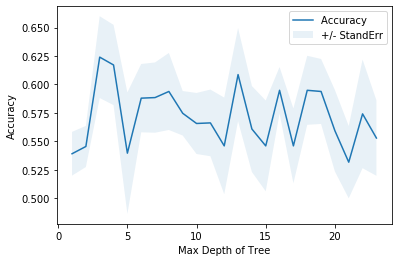

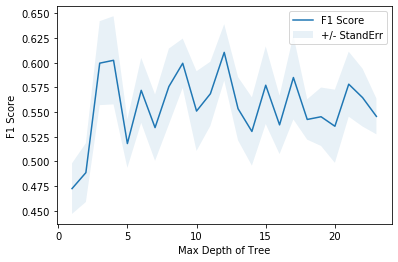

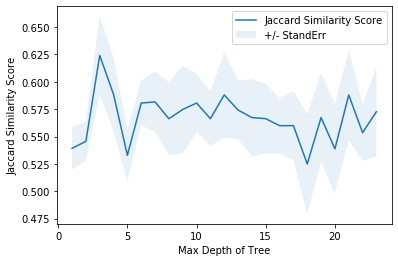

In [406]:
test_param_DT('Max Depth of Tree', 'gini', None)

[0.52 0.57 0.59 0.57 0.57 0.55 0.53 0.55 0.5  0.52 0.54 0.6  0.54 0.56
 0.53 0.5  0.57 0.55 0.56 0.55 0.55 0.53 0.56]
[0.48 0.56 0.56 0.56 0.55 0.53 0.52 0.5  0.49 0.5  0.55 0.55 0.51 0.52
 0.51 0.55 0.51 0.54 0.51 0.54 0.55 0.53 0.54]
[0.52 0.57 0.59 0.57 0.55 0.5  0.55 0.55 0.53 0.51 0.53 0.53 0.52 0.53
 0.53 0.53 0.53 0.53 0.59 0.51 0.55 0.51 0.52]

The best accuracy was 0.59591 with Max Depth of Tree = 12
The best F1 Score was 0.56252 with Max Depth of Tree = 3
The best Jaccard Similarity score was 0.58902 with Max Depth of Tree = 19


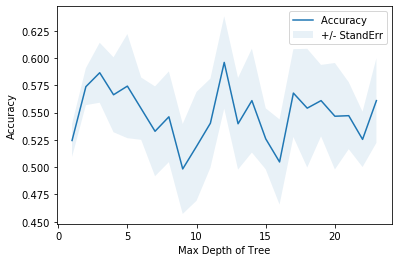

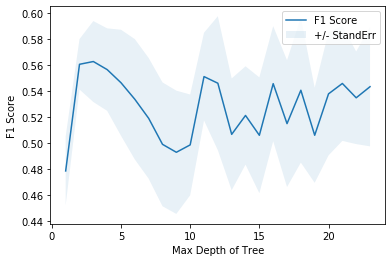

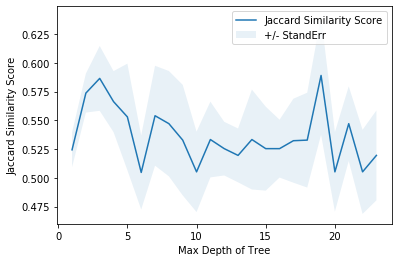

In [407]:
test_param_DT('Max Depth of Tree', 'gini', "balanced")

In [408]:
pd.DataFrame(clfs_list)

,1: Classifier,2: Accuracy,3: F1 Score,4: Jaccard
0,"loanTree, Max Depth of Tree 5, entropy, None",0.650575,0.606609,0.622989
1,"loanTree, Max Depth of Tree 2, entropy, balanced",0.579566,0.571054,0.565773
2,"loanTree, Max Depth of Tree 2, entropy, balanced",0.565773,0.571054,0.565773
3,"loanTree, Max Depth of Tree 12, gini, None",0.624010,0.610551,0.624010
4,"loanTree, Max Depth of Tree 3, gini, balanced",0.595913,0.562522,0.589017


In [246]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

C:\Users\dasha\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [421]:
y_orig, y_hat = test_param_DT2('Max Depth of Tree', 'entropy', None, n=5)

# Plotting confusion Matrix

In [267]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[28 36]
 [22 57]]


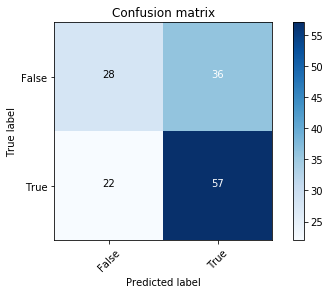

In [435]:
cnf_matrix = confusion_matrix(y_orig, y_hat)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["False", "True"], normalize= False,  title='Confusion matrix')
plt.savefig(NOTEBOOK_PATH / "Confusion_matrix.svg", bbox_inches="tight")

In [423]:
Tree = DecisionTreeClassifier(max_depth = 5, criterion="entropy", class_weight=None).fit(X, y)
Tree 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [256]:
targetNames

array([False,  True])

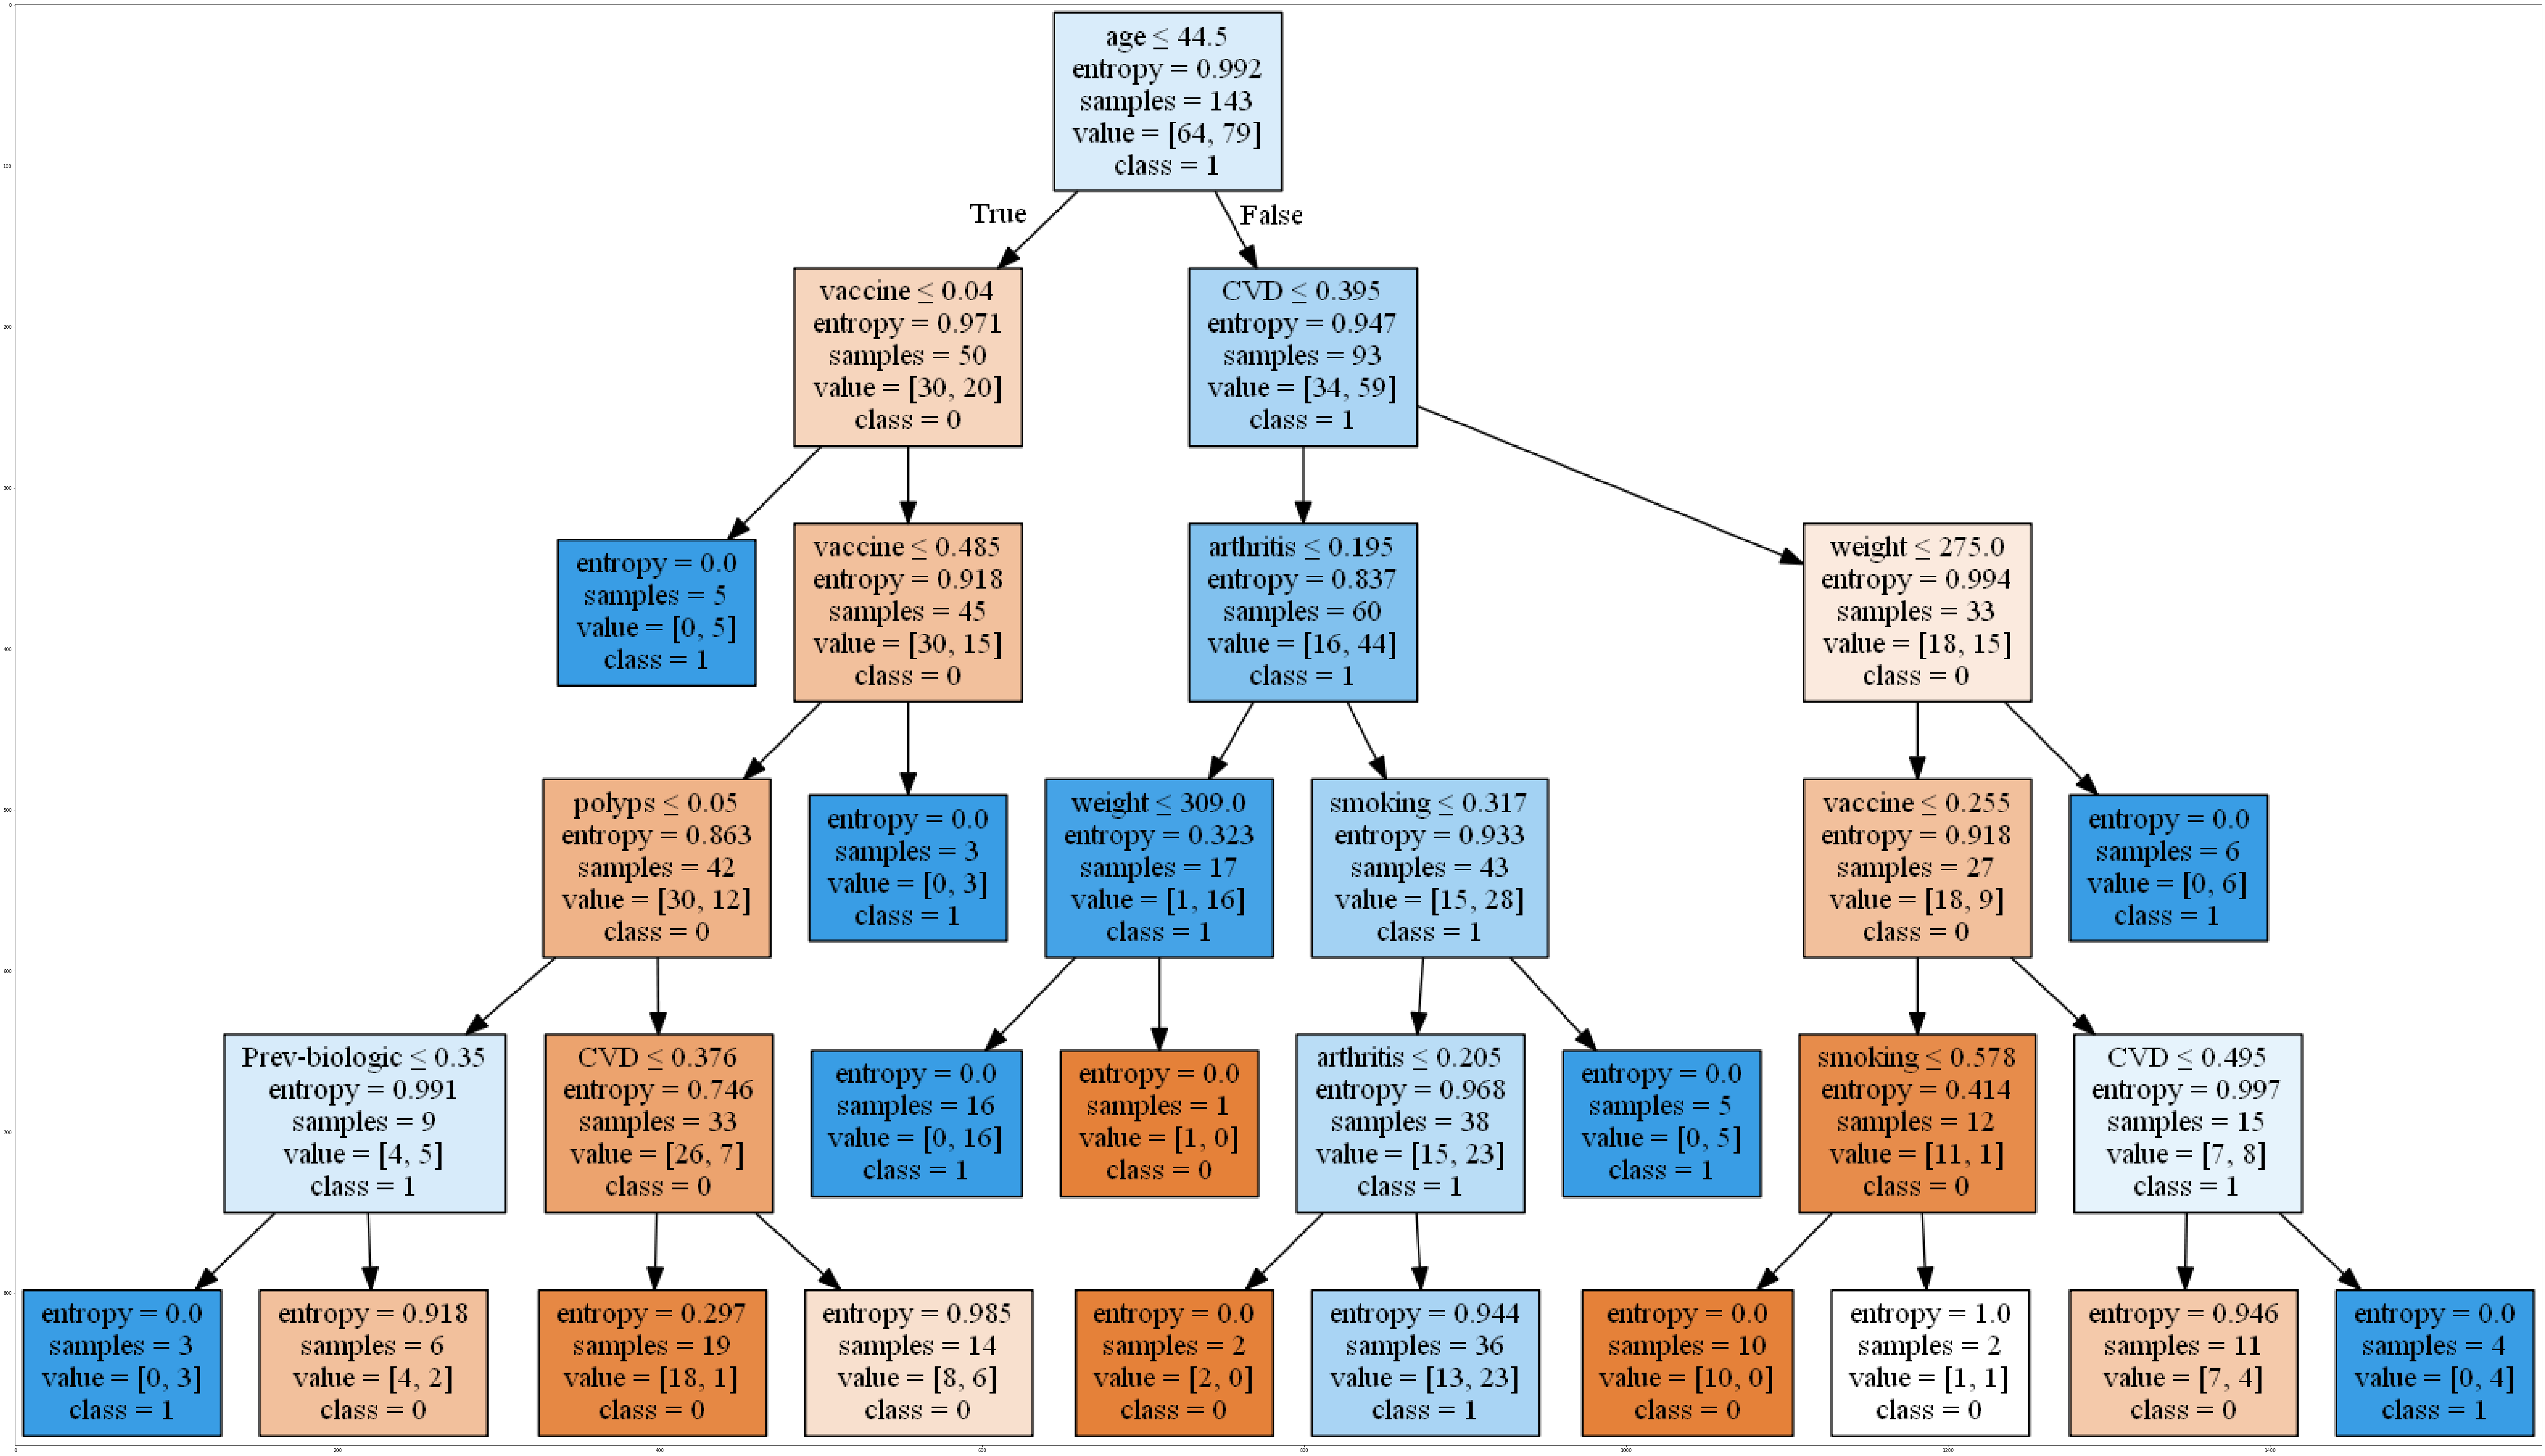

In [437]:
dot_data_DT = StringIO()
filename = (NOTEBOOK_PATH / "loanTree.png").as_posix()
featureNames = X.columns
targetNames = np.unique(y)
out_DT=tree.export_graphviz(Tree, feature_names=featureNames, out_file=dot_data_DT, class_names=["0", "1"], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data_DT.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100,200))
plt.imshow(img,interpolation='nearest')

In [425]:
yhat = Tree.predict(X)
yhat

array([False,  True,  True, False, False,  True,  True, False,  True,
        True,  True, False, False, False,  True, False,  True,  True,
       False,  True, False, False, False, False,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False, False, False,  True,  True,  True, False,  True, False,
        True, False,  True,  True, False,  True, False,  True,  True,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False,  True, False, False,  True,  True,
       False, False,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False,

In [428]:
(y_orig == y_hat).sum() / len(y_hat)

0.5944055944055944

Confusion matrix, without normalization
[[51 13]
 [14 65]]


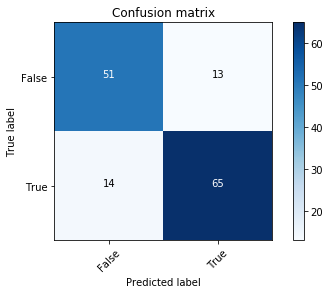

In [434]:
cnf_matrix = confusion_matrix(y, yhat)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["False", "True"],normalize= False,  title='Confusion matrix')
plt.savefig(NOTEBOOK_PATH / "Confusion_matrix.svg", bbox_inches="tight")

In [263]:
before_and_after = pd.DataFrame(y, y_hat)
before_and_after

,y_bi
False,NaN
True,NaN
True,NaN
True,NaN
True,NaN
True,NaN
True,NaN
False,NaN
True,NaN
True,NaN


## Export processed data

In [ ]:
table = pa.Table.from_pandas(data_final2, preserve_index=False)
pq.write_table(table, NOTEBOOK_PATH.joinpath("data_final2.parquet"))

In [119]:
df = pq.read_table(NOTEBOOK_PATH.joinpath("data_final2.parquet")).to_pandas()

In [120]:
len(df)

344

In [132]:
df2 = df[(df[["acq", "acq2", "acq3", "acq4", "acq5"]] <= 6).any(axis=1)].copy()

In [133]:
len(df2)

143

In [134]:
df2["y"] = df2[["acq2", "acq3", "acq4", "acq5"]].mean(axis=1) - df2["acq"]

In [135]:
len(df2)

143

In [136]:
len(df2["y"].dropna())

143

In [141]:
pd.set_option("max_rows", 1000)
pd.set_option("max_columns", 1000)

In [144]:
# df

In [129]:
len(df2[["acq", "acq2", "acq3", "acq4", "acq5"]].dropna())

121

In [73]:
data_final.head()

,id,race,sex,work,disab,smoking,polyps,vaccine,arthritis,CVD,...,acq,acq2,acq3,acq4,acq5,time1,time2,time3,time4,time5
0,1113,filipino,0,0,0,0.195593,0.1,0.32,0.10,0.54,...,2.500000,2.500000,2.50,2.00,1.800,0.0,12.0,23.0,38.0,103.0
1,2902,chinese,0,0,0,0.333048,0.2,0.12,0.31,0.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1908,south east asian,0,1,0,0.493515,0.2,0.40,0.01,0.50,...,2.166667,0.433333,0.39,0.39,0.468,0.0,11.0,20.0,41.0,103.0
3,3002,south asian,1,0,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3006,south asian,0,1,1,0.471206,0.1,0.20,0.37,0.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df.head()

,id,race,sex,work,disab,smoking,polyps,vaccine,arthritis,CVD,...,acq,acq2,acq3,acq4,acq5,time1,time2,time3,time4,time5
0,1113,filipino,0,0,0,0.195593,0.1,0.32,0.10,0.54,...,2.500000,2.500000,2.50,2.00,1.800,0.0,12.0,23.0,38.0,103.0
1,2902,chinese,0,0,0,0.333048,0.2,0.12,0.31,0.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1908,south east asian,0,1,0,0.493515,0.2,0.40,0.01,0.50,...,2.166667,0.433333,0.39,0.39,0.468,0.0,11.0,20.0,41.0,103.0
3,3002,south asian,1,0,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3006,south asian,0,1,1,0.471206,0.1,0.20,0.37,0.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
acq_means = acqs_inrange.T.mean(axis=0)
acq_se = acqs_inrange.T.std(axis=0)/np.sqrt(5)
acq_means

acq     3.443452
acq2    2.025051
acq3    2.058464
acq4    1.992368
acq5    1.923522
dtype: float64

In [83]:
time_means = times_inrange.T.mean(axis=0)
time_means

time1     0.000000
time2     9.226190
time3    17.785714
time4    34.773006
time5    96.565217
dtype: float64

<Figure size 432x288 with 0 Axes>

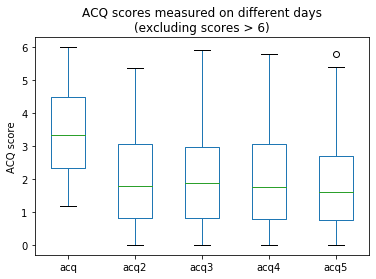

In [105]:
plt.figure()
acqs_inrange.T.plot(kind="box")
plt.title('ACQ scores measured on different days\n(excluding scores > 6)')
plt.ylabel('ACQ score')
plt.savefig(NOTEBOOK_PATH / "ACQBoxplots.svg", bbox_inches="tight")

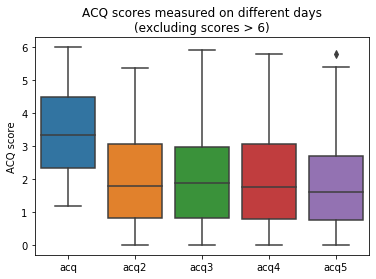

In [153]:
plt.figure()
sns.boxplot(data=acqs_inrange.T)
plt.title('ACQ scores measured on different days\n(excluding scores > 6)')
plt.ylabel('ACQ score')
plt.savefig(NOTEBOOK_PATH / "ACQBoxplots.svg", bbox_inches="tight")

In [160]:
X_all

,id,race,sex,work,disab,smoking,polyps,vaccine,arthritis,CVD,Prev-biologic,allergy,weight,height,age,in_study
0,1113,filipino,0,0,0,0.195593,0.1,0.32,0.10,0.54,0.4,0.6,257.0,70.0,41,True
1,2902,chinese,0,0,0,0.333048,0.2,0.12,0.31,0.42,0.1,0.1,277.0,59.0,53,False
2,1908,south east asian,0,1,0,0.493515,0.2,0.40,0.01,0.50,0.1,0.6,146.0,70.0,63,True
3,3002,south asian,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,False
4,3006,south asian,0,1,1,0.471206,0.1,0.20,0.37,0.74,0.2,0.8,242.0,72.0,35,False
5,1209,white (caucasian),1,1,1,0.374920,0.5,0.03,0.34,0.13,0.1,0.0,130.0,68.0,22,False
6,1705,south east asian,0,0,0,0.027924,0.3,0.28,0.11,0.31,0.7,0.5,251.0,76.0,83,False
7,3004,south asian,0,0,1,0.359783,0.4,0.46,0.29,0.53,0.5,0.8,127.0,60.0,63,True
8,1707,black,1,1,1,0.093265,0.2,0.01,0.44,0.56,0.8,0.4,133.0,65.0,85,False
9,2108,aboriginal,0,1,1,0.206549,0.2,0.02,0.04,0.54,0.4,0.7,140.0,72.0,32,False


In [87]:
from scipy import stats

In [102]:
f_val, p_val = stats.f_oneway(data_inrange["acq"].dropna(),
                             data_inrange["acq5"].dropna())  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 93.85891134091317 , P = 1.262213642392905e-19


In [106]:
f_val, p_val = stats.f_oneway(data_inrange["acq2"].dropna(),
                             data_inrange["acq5"].dropna())  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.3839856872740746 , P = 0.5359272281595432
